In [22]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [23]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [24]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [25]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [26]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()


In [28]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(scaler.fit_transform(df_market_data),
# Copy the crypto names from the original DataFrame 
 columns=df_market_data.columns,
 # Set the coin_id column as index 
   index=df_market_data.index)
# Display the scaled DataFrame
df_market_data_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [29]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [30]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(df_market_data_scaled)
    inertia_values.append(kmeans.inertia_)
    
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(df_market_data_scaled)
# 2. Fit the model to the data using `df_market_data_scaled` and appending the model.inertia_ to the inertia list
cluster_labels = kmeans.predict(df_market_data_scaled)
df_market_data_scaled_with_clusters = df_market_data_scaled.copy()
df_market_data_scaled_with_clusters['Cluster'] = cluster_labels
df_market_data_scaled_with_clusters.head()



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [48]:
# Create a dictionary with the data for the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Convert the dictionary to a DataFrame
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame to ensure it is correct
df_elbow.head()



,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051


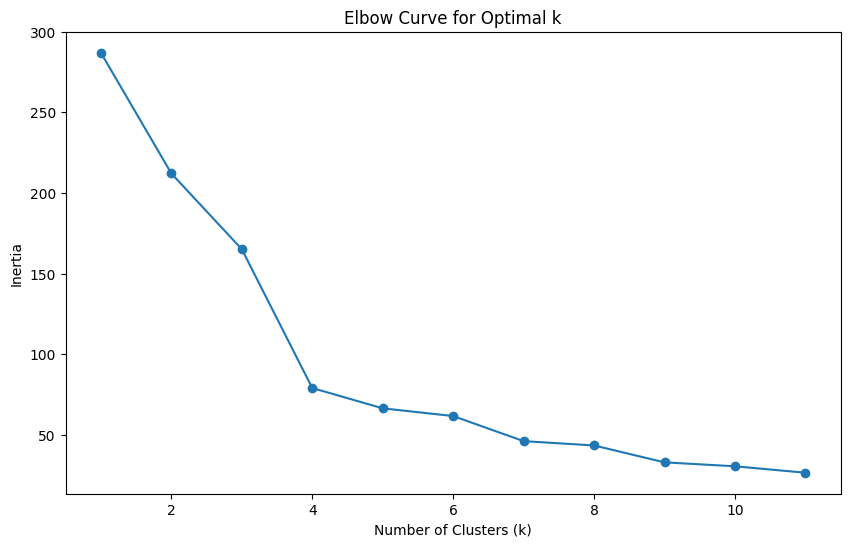

In [49]:
# Plot a line chart with all the inertia values computed with the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Optimal k')
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for 'k' is 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [32]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=1)

In [33]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(df_market_data_scaled)

KMeans(n_clusters=4, random_state=1)

In [35]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
cluster_labels = kmeans.predict(df_market_data_scaled)


In [36]:
# Create a copy of the scaled DataFrame
df_market_data_scaled_with_clusters = df_market_data_scaled.copy()

In [37]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_market_data_scaled_with_clusters['Cluster'] = cluster_labels


# Display the copy of the scaled DataFrame
df_market_data_scaled_with_clusters.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [38]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means
df_market_data_scaled_with_clusters.hvplot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    by="Cluster", 
    hover_cols=["Cluster"],
    width=800, 
    height=400,
    title="Cryptocurrency Clusters based on 24h and 7d Price Change Percentages"
)

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [41]:
# Create a PCA model instance and set `n_components=3`
pca = PCA(n_components=3)

In [44]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
market_data_pca = pca.fit_transform(df_market_data_scaled)
# Create a DataFrame with the PCA data
df_market_data_pca = pd.DataFrame(market_data_pca, 
                                  columns=['PC1', 'PC2', 'PC3'], 
                                  index=df_market_data_scaled.index)


In [ ]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component
explained_variance = pca.explained_variance_ratio_.sum()
print(f"Total explained variance by the 3 principal components: {explained_variance:.2%}")


Total explained variance by the 3 principal components: 89.50%


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total explained variance by three principal components is 89.50%

In [50]:
# Create a new DataFrame with the PCA data
df_market_data_pca = pd.DataFrame(
    market_data_pca, 
    columns=['PC1', 'PC2', 'PC3'], 
    index=df_market_data_scaled.index 
)

# Display the PCA DataFrame to verify
df_market_data_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [46]:
# Create a list with the number of k-values from 1 to 11
k_values_pca = list(range(1, 12))


In [ ]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values_pca:
    kmeans_pca = KMeans(n_clusters=k, random_state=1)
    kmeans_pca.fit(df_market_data_pca)
    inertia_values_pca.append(kmeans_pca.inertia_)
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
kmeans_pca_optimal = KMeans(n_clusters=4, random_state=1)
# 2. Fit the model to the data using `df_market_data_pca`
kmeans_pca_optimal.fit(df_market_data_pca)
# 3. Append the model.inertia_ to the inertia list


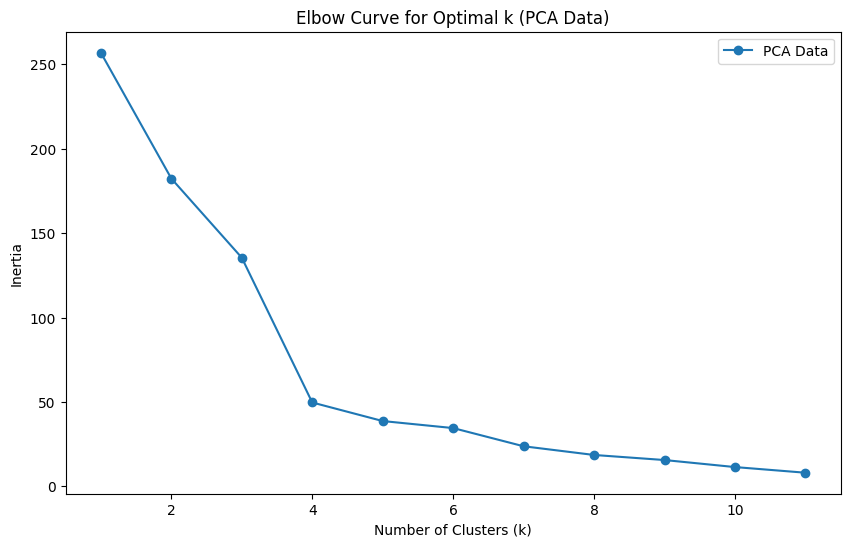

In [51]:
# Create a list with the number of k-values from 1 to 11
k_values_pca = list(range(1, 12)) 

# Create an empty list to store the inertia values
inertia_values_pca = []

# Compute inertia for each possible value of k
for k in k_values_pca:
    kmeans_pca = KMeans(n_clusters=k, random_state=1)
    kmeans_pca.fit(df_market_data_pca)
    inertia_values_pca.append(kmeans_pca.inertia_)

# Create a dictionary with the data for the Elbow curve
elbow_data_pca = {
    'k': k_values_pca,
    'inertia': inertia_values_pca
}

# Convert the dictionary to a DataFrame
df_elbow_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame to ensure it is correct
df_elbow_pca.head()

# Plot the Elbow Curve for the PCA Data
plt.figure(figsize=(10, 6))
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o', label='PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Optimal k (PCA Data)')
plt.legend()
plt.show()



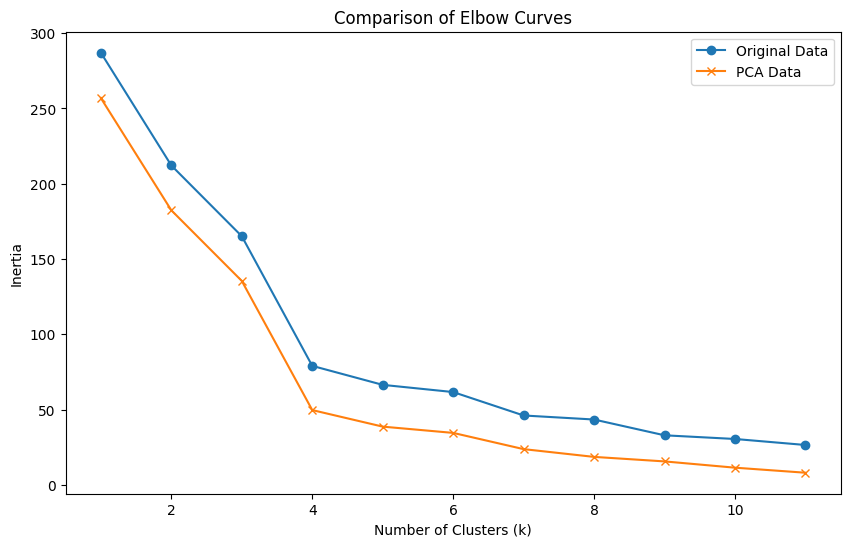

In [52]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', label='Original Data')
plt.plot(k_values_pca, inertia_values_pca, marker='x', label='PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Comparison of Elbow Curves')
plt.legend()
plt.show()



#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**The best value for `k` is also 4 based on the Elbow Curve for PCA data.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No,it looks to be the same for original data and PCA data.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [53]:
# Initialize the K-Means model using the best value for k
kmeans_pca_optimal = KMeans(n_clusters=4, random_state=1)

In [54]:
# Fit the K-Means model using the PCA data
kmeans_pca_optimal.fit(df_market_data_pca)

KMeans(n_clusters=4, random_state=1)

In [55]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
pca_cluster_labels = kmeans_pca_optimal.predict(df_market_data_pca)

# Print the resulting array of cluster values
print("Cluster Labels (PCA Data):", pca_cluster_labels)

Cluster Labels (PCA Data): [2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [56]:
# Create a copy of the scaled PCA DataFrame
df_market_data_pca_with_clusters = df_market_data_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_market_data_pca_with_clusters['Cluster'] = pca_cluster_labels

# Display the copy of the scaled PCA DataFrame with clusters
df_market_data_pca_with_clusters.head()

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [60]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
pca_cluster_plot = df_market_data_pca_with_clusters.hvplot.scatter(
    x="PC1", 
    y="PC2", 
    by="Cluster", 
    hover_cols=["Cluster"],
    width=800, 
    height=400,
    title="Cryptocurrency Clusters based on PC1 and PC2"
)

# Display the scatter plot
pca_cluster_plot

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,Cluster)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

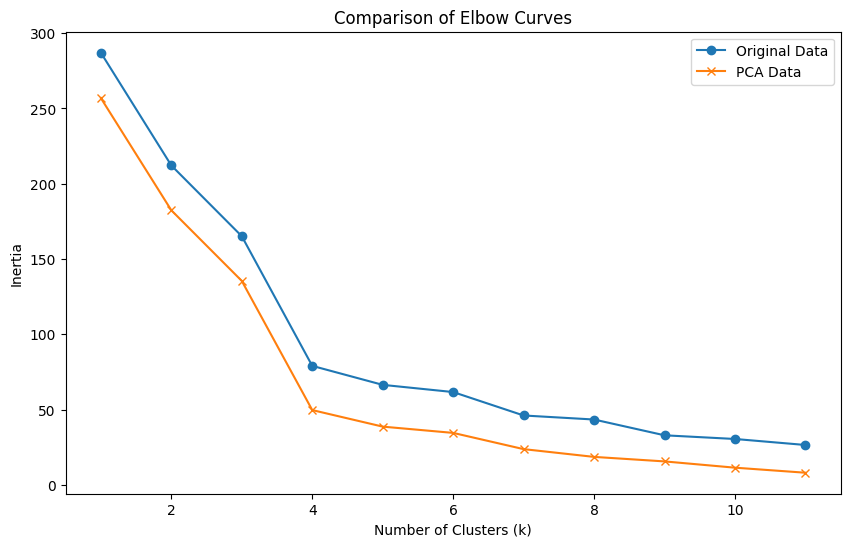

In [57]:
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', label='Original Data')
plt.plot(k_values_pca, inertia_values_pca, marker='x', label='PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Comparison of Elbow Curves')
plt.legend()
plt.show()

In [61]:
# Composite plot to contrast the clusters
original_cluster_plot = df_market_data_scaled_with_clusters.hvplot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    by="Cluster", 
    hover_cols=["Cluster"],
    width=800, 
    height=400,
    title="Cryptocurrency Clusters based on 24h and 7d Price Change Percentages (Original Data)"
)
# Display the composite plots
(original_cluster_plot + pca_cluster_plot).cols(1)

:Layout
   .NdOverlay.I  :NdOverlay   [Cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)
   .NdOverlay.II :NdOverlay   [Cluster]
      :Scatter   [PC1]   (PC2,Cluster)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Simplified Cluster Structure: PCA reduces the data’s dimensionality by capturing the most critical information, simplifying the clusters' structure. This can lead to more defined and distinguishable clusters, as unnecessary noise and less informative features are removed.

Improved Computational Efficiency: With fewer features, the clustering process becomes faster and requires less memory. This can be particularly advantageous for large datasets.

Potential Loss of Detailed Information: While PCA retains the most variance, it might lose some nuanced details found in the original data. As a result, clusters may be less precise in capturing subtle differences between data points, which could be important for specific analyses.

Enhanced Visualization: Clustering with fewer, more informative features allows for straightforward visualization of clusters in a 2D or 3D space, making it easier to interpret the results.